### Load & Integrate Data

In [2]:
import pandas as pd

sp = pd.read_csv('../data/sp500_clean.csv')
sp['date'] = pd.to_datetime(sp['date']).dt.date

daily = pd.read_csv('../data/wsb_daily_sentiment.csv')
daily['date'] = pd.to_datetime(daily['date']).dt.date

merged = pd.merge(sp, daily, on='date', how='inner')
merged = merged[merged['date'] >= pd.to_datetime("2022-01-01").date()]
merged = merged.sort_values('date')
merged['sentiment_ma7'] = merged['sentiment'].rolling(window=7).mean()
merged


/var/folders/_q/7yh0jvvs0gz9cp0w3_k24t2w0000gq/T/ipykernel_39500/377688892.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,date,close,sentiment,sentiment_ma7
1,2022-03-28,4575.52,0.096135,NaN
2,2022-03-29,4631.60,0.064216,NaN
3,2022-03-30,4602.45,0.120320,NaN
4,2022-03-31,4530.41,0.091493,NaN
5,2022-04-01,4545.86,0.059293,NaN
...,...,...,...,...
749,2025-03-21,5667.56,0.045626,0.042796
750,2025-03-24,5767.57,0.041450,0.043801
751,2025-03-25,5776.65,0.047959,0.044603
752,2025-03-26,5712.20,0.048819,0.046689


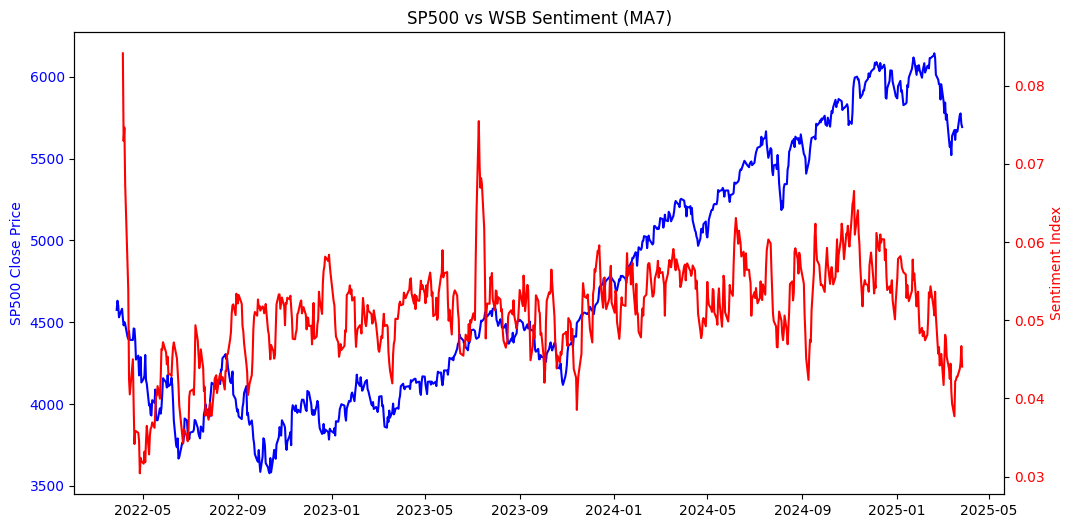

In [3]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12,6))

# SP500 (left axis)
ax1.plot(merged['date'], merged['close'], color='blue', label='SP500')
ax1.set_ylabel('SP500 Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create second axis
ax2 = ax1.twinx()

# Sentiment MA7 (right axis)
ax2.plot(merged['date'], merged['sentiment_ma7'], color='red', label='Sentiment (MA7)')
ax2.set_ylabel('Sentiment Index', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("SP500 vs WSB Sentiment (MA7)")
plt.show()




In [4]:
merged.to_csv("../data/merged_sp500_wsb.csv", index=False)